## Obyčejné diferenciální rovnice


## Možnosti řešení
symbolicky
- sympy.dsolve

numericky
- scipy.integrate.solve_ivp
- scipy.integrate.odeint
- vlastní metody (Euler, ...)

Řešme rovnici $$dy/dt=-3y$$ s počáteční podmínkou $y(0)=1$

In [69]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [70]:
# Definice rovnice (čemu je rovno dy/dt)
def dydt(t, y):
    return -3 * y
    #return -2*y**2 + t/2

# Počáteční podmínky
y0 = [1]

t_span = (0, 5)                 # časový interval
t = np.linspace(0, 5, 100)

scipy.integrate.odeint (starší metoda)

Řešení je pole s rozměry (100, 1)


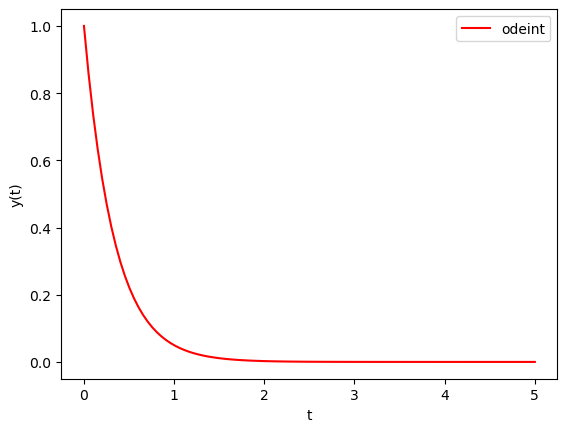

In [71]:
# Řešení pomocí odeint
from scipy.integrate import odeint

# Definice rovnice (čemu je rovno dy/dt)
def dy_dt(y, t):         # jiná definice - nutno přehodit t a y!
    return -3 * y

solution_odeint = odeint(dy_dt, y0, t)
print("Řešení je pole s rozměry", solution_odeint.shape)

# Vykreslení
plt.plot(t, solution_odeint, label='odeint', color='red')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

scipy.integrate.solve_ivp (optimalizovaná, doporučená)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.051e-02 ...  4.949e+00  5.000e+00]
        y: [[ 1.000e+00  8.594e-01 ...  4.041e-07  3.482e-07]]
      sol: None
 t_events: None
 y_events: None
     nfev: 92
     njev: 0
      nlu: 0


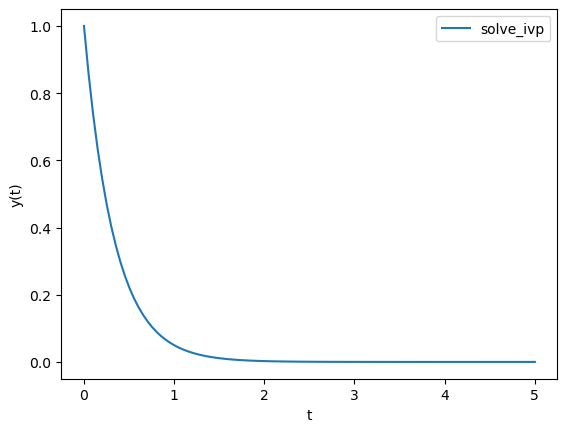

In [72]:
# Řešení pomocí solve_ivp
from scipy.integrate import solve_ivp
solution = solve_ivp(dydt, t_span, y0, t_eval=t)
print(solution)

# Vykreslení
plt.plot(solution.t, solution.y[0], label='solve_ivp')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

sympy.dsolve

In [73]:
from sympy import Function, dsolve, Derivative, Eq, symbols
t,y0 = symbols("t y0")                              # alternativně from sympy.abc import t

y = Function('y')
ode = Eq(Derivative(y(t), t), -3 * y(t))

# Symbolické řešení
solution_symbolic = dsolve(ode, ics={y(0): y0})     # PP y(0) = 1  
print(solution_symbolic)
solution_expr = solution_symbolic.rhs.subs(y0, 1)   # pouze pravá strana (y(t))

Eq(y(t), y0*exp(-3*t))


Vizualizace pomocí sympy

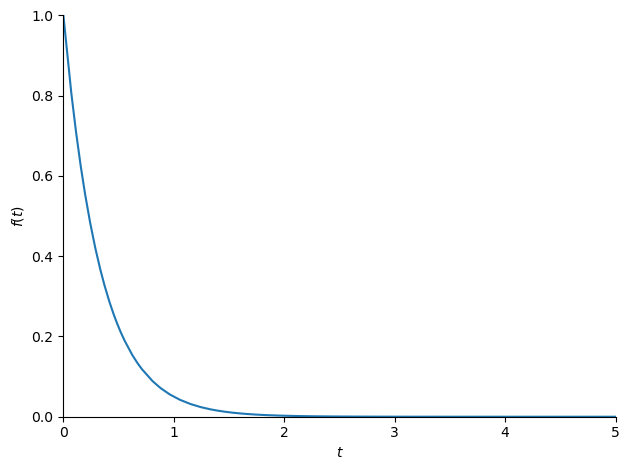

In [74]:
#from sympy import plot
y0 = 1
from sympy.plotting import plot
#plot(solution_expr)                            # rychlé vykreslení
p = plot(solution_expr, (t, 0, 5), show=False)  # Omezení na interval t od 0 do 5, vykreslujeme pravou stranu (rhs)
p.xlim = (0, 5)  # Nastavení meze pro osu x
p.ylim = (0, 1)  # Nastavení meze pro osu y
p.show()

Vizualizace pomocí matplotlib

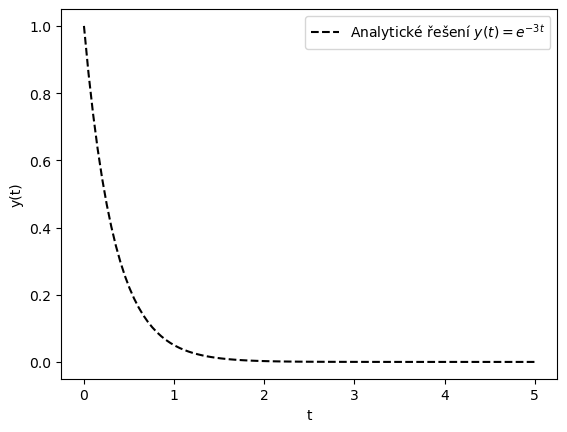

In [75]:
from sympy import lambdify

# Symbolické řešení (rhs) - převod na funkci
y_function = lambdify(t, solution_expr, 'numpy')

t_values = np.linspace(0, 5, 100)       # časové hodnoty pro vykreslení
y_values = y_function(t_values)         # výpočet y(t)

# Vykreslení
plt.plot(t_values, y_values, label='Analytické řešení $y(t) = e^{-3t}$', color='black', linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Eulerova metoda

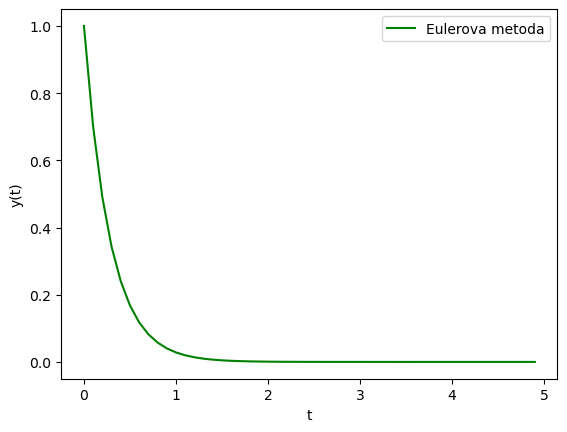

In [76]:
# Eulerova metoda
h = 0.1  # krok
t_euler = np.arange(0, 5, h)
y_euler = np.zeros(len(t_euler))
y_euler[0] = 1  # počáteční podmínka

# Aproximace řešení
for i in range(1, len(t_euler)):
    y_euler[i] = y_euler[i-1] + h * (-3 * y_euler[i-1])

# Vykreslení
plt.plot(t_euler, y_euler, label='Eulerova metoda', color='green')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()


Porovnáné metod

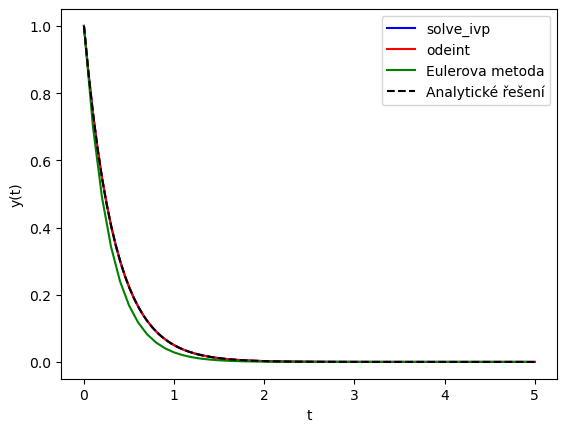

In [77]:
plt.plot(solution.t, solution.y[0], label='solve_ivp', color='blue')
plt.plot(t_values, solution_odeint, label='odeint', color='red')
plt.plot(t_euler, y_euler, label='Eulerova metoda', color='green')
plt.plot(t_values, np.exp(-3*t_values), label='Analytické řešení', color='black', linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()


#### Cvičení - řešení rovnice
Vyřešte rovnici 

$$ y^{\prime} = x; ~~y(x_0) = 2,x_0 = 0$$

pomocí 

- symbolické matematiky,
- vybrané numerické metody (jednokrokové),
- vybrané vestavěné funkce softwaru (např. *integrate*).


Porovnejte jednotlivá řešení z hlediska implementace, rychlosti a přesnosti řešení.

rovnice: Eq(Derivative(y(x), x), x)
řešení:  Eq(y(x), x**2/2 + 2)
rhs:     x**2/2 + 2


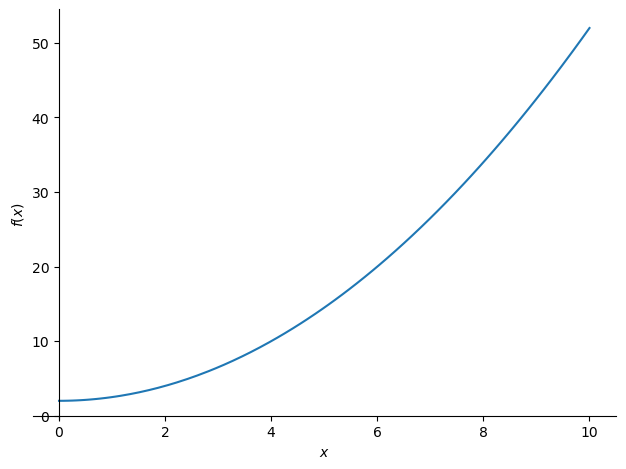

In [78]:
# symbolické řešení (y'= x)
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

x = symbols('x')                                        # definice symbolů
y = symbols('y', cls=Function)                          # y=Function('y')

eq = Eq(y(x).diff(x), x)                                # y' = x
print("rovnice:", eq)
sol = dsolve(eq, hint='1st_linear', ics={y(0): 2})      # metoda, množina počátečních podmínek (y(0) = 2)
#                lineární 1. řádu, initial conditions

print("řešení: ", sol)
print("rhs:    ", sol.rhs)                              # pravá strana (right hand side)
plot(sol.rhs, (x,0,10))                                 # graf pomocí sympy

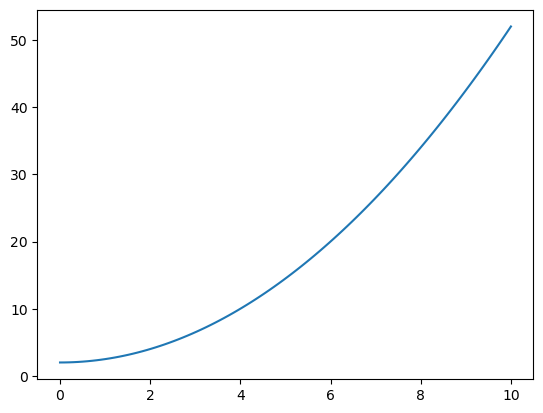

In [79]:
# vykreslení analytického řešení (y'= x) pomocí matplotlib
from sympy import lambdify
f = lambdify(x, sol.rhs, "numpy")       # převod funkce sympy -> numpy (symbol, výraz, modul)

xn = np.linspace(0, 10, 100)
yn = f(xn)
plt.plot(xn, yn)
plt.show()

Explicitní Eulerova metoda

$𝑦^{𝑖+1}=𝑦^{𝑖}+𝑓(𝑥^𝑖,𝑦^𝑖)\Delta x$, $\quad$ řešíme rovnici $y'= x$


x:[0 1 2 3 4 5 6 7 8 9]
y:[ 2.  2.  3.  5.  8. 12. 17. 23. 30. 38.]


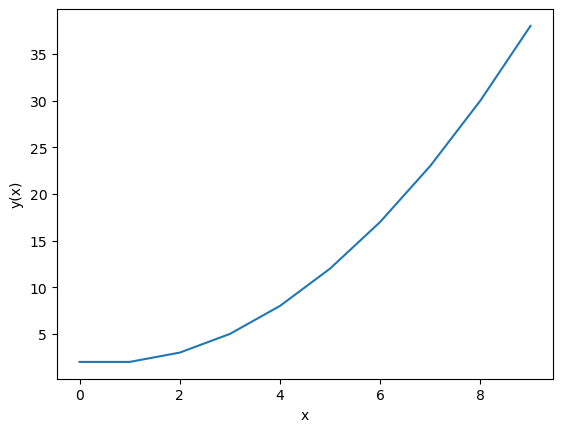

In [80]:
# řešení rovnice (y'= x) Eulerovou metodou pomocí vlastního kódu 
def odeEuler(f, y0, x):
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(0,len(x)-1):
        y[i+1] = y[i] + f(y[i],x[i])*(x[i+1] - x[i])
    return y

x0 = 0
y0 = 2
xmax = 10
dx = 1

x = np.arange(x0, xmax, dx)

f = lambda y, x: x                      # funkce y a x, vrací x (rovnice y'= x)
# print(f(1,2))

def funkce(y, x):                       # totéž
    return x

y = odeEuler(f, y0, x)                  # (funkce, poč. bod, pole x)

print(f"x:{x}\ny:{y}")                  # pole x a pole y
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

Knihovna scipy - odeint
- Ordinary Differential Equation

x:[0 1 2 3 4 5 6 7 8 9]
y:[[ 2.        ]
 [ 2.50000001]
 [ 4.00000001]
 [ 6.50000001]
 [10.00000001]
 [14.50000001]
 [20.00000001]
 [26.50000001]
 [34.00000001]
 [42.50000001]]


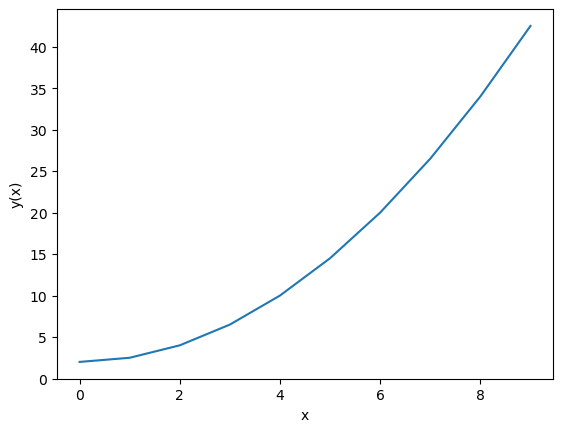

In [81]:
# numericky pomocí scipy
from scipy.integrate import odeint

f = lambda y, x: x                      # funkce y a x, vrací x (rovnice y'= x)
#def f(y, x):                           # totéž
#    return x

x0 = 0
y0 = 2
xmax = 10
dx = 1

x = np.arange(x0, xmax, dx)
y = odeint(f, y0, x)                    # funkce, poč. bod, pole x

print(f"x:{x}\ny:{y}")
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

Řešte diferenciální rovnici $$\frac{dy}{dt}=-yt+13$$ pomocí scipy.integrate.odeint

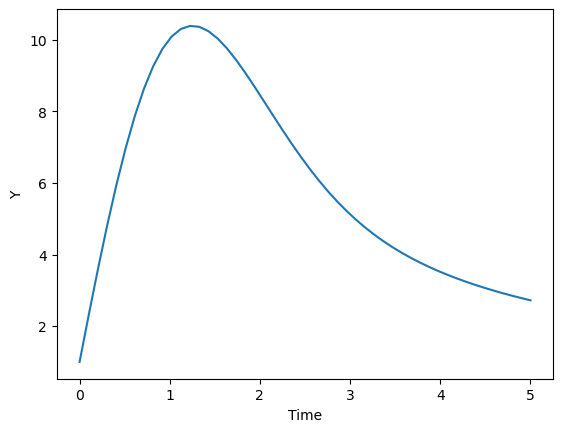

In [82]:
# numericky pomocí scipy
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 
  
def returns_dydt(y,t):  # vrací pravou stranu ODE (derivaci), parametry aktuální stav systému a čas
    dydt = -y * t + 13
    return dydt 

y0 = 1                              # počáteční podmínka 
  
t = np.linspace(0,5)                # hodnoty času
  

y = odeint(returns_dydt, y0, t)     # řešení ODE 
  

plt.plot(t,y)                       # vykreslení výsledků 
plt.xlabel("Time") 
plt.ylabel("Y") 
plt.show()


## Soustavy diferenciálních rovnic

Řešte následující soustavu diferenciálních rovnic:
$$\frac{dx}{dt}=−y$$
$$\frac{dy}{dt}=x$$


Kvůli přehlednosti připravíe pro vykreslení výsledků saostatnou funkci

In [85]:
# vykreslení výsledků
import matplotlib.pyplot as plt
def vykresli(t, sol):
    plt.figure(figsize = (14, 4))

    plt.subplot(121)
    plt.plot(t, sol[0], 'b', label='x(t)')
    plt.plot(t, sol[1], 'g', label='y(t)')
    plt.xlabel('čas')
    plt.ylabel('hodnota')
    plt.legend(loc='best')
    plt.title('Řešení soustavy diferenciálních rovnic')
    plt.grid()

    plt.subplot(122)

    # Vykreslení trajektorie
    #plt.figure(figsize=(6,6))
    plt.plot(sol[0], sol[1], label="Trajektorie (x, y)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Kruhový pohyb podle soustavy ODE")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.grid()
    plt.axis("equal")  # Zajištění poměru 1:1
    plt.show()

scipy.odeint (starší metoda)

Řešení je pole s rozměry (100, 2)


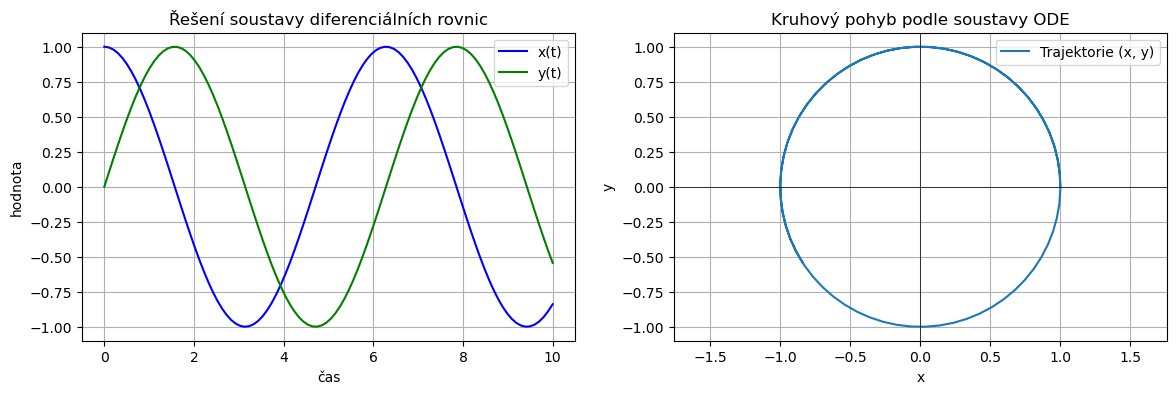

In [86]:
# numericky pomocí scipy.odeint
import numpy as np
from scipy.integrate import odeint

# uvažujme U = [x,y]
def system(U, t):               # vrací pravé strany obou ODE, odpovídá dU/dt
    dxdt = -U[1]                # 1. rovnice            dx/dt = -y
    dydt = U[0]                 # 2. rovnice            dy/dt = x
    return [dxdt, dydt]

U0 = [1.0, 0.0]                 # počáteční podmínky    x = 1, y = 0

t = np.linspace(0, 10, 100)     # časový rozsah

sol = odeint(system, U0, t)     # řešení soustavy (systém, poč. podmínky, pole nez. proměnné)

print("Řešení je pole s rozměry", sol.shape)
vykresli(t, [sol[:, 0], sol[:, 1]])


scipy.solve_ivp (optimalizovaná, doporučená)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e-01 ...  9.899e+00  1.000e+01]
        y: [[ 1.000e+00  9.949e-01 ... -8.884e-01 -8.375e-01]
            [ 0.000e+00  1.008e-01 ... -4.589e-01 -5.461e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 86
     njev: 0
      nlu: 0


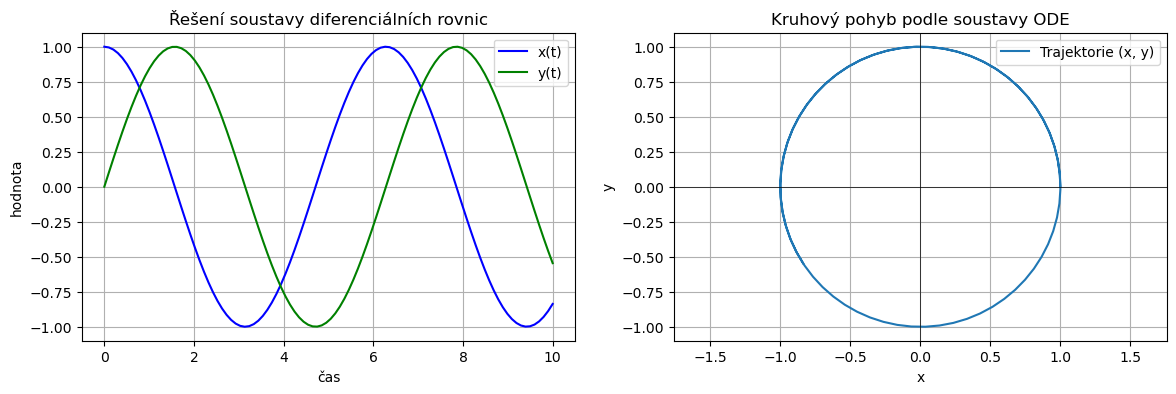

In [87]:
from scipy.integrate import solve_ivp

# Definice soustavy ODE
def system(t, z):
    x, y = z
    dxdt = -y
    dydt = x
    return [dxdt, dydt]

# Časový interval a počáteční podmínky
t_span = (0, 10)  # Čas od 0 do 10
t_eval = np.linspace(0, 10, 100)  # Husté vzorkování pro hladký graf
initial_conditions = [1, 0]  # x(0) = 1, y(0) = 0

# Numerické řešení ODE
sol = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)
print(sol)
vykresli(t, sol.y)


sympy

In [88]:
from sympy import symbols, Function, Eq, dsolve

# Definice proměnných
t = symbols('t')
x = Function('x')(t)
y = Function('y')(t)

# Definice soustavy diferenciálních rovnic
eq1 = Eq(x.diff(t), -y)
eq2 = Eq(y.diff(t), x)

# Řešení soustavy
solution = dsolve((eq1, eq2))
print(solution)

[Eq(x(t), -C1*sin(t) - C2*cos(t)), Eq(y(t), C1*cos(t) - C2*sin(t))]


Počáteční podmínky x0, y0

In [ ]:
from sympy import solve

# Definice počátečních podmínek
x0, y0 = symbols('x0 y0')
ics = {x.subs(t, 0): x0, y.subs(t, 0): y0}

# Dosazení podmínek
constants = solve([sol.rhs.subs(t, 0) - val for sol, val in zip(solution, [x0, y0])]) #vechny rovnice a pp
solution_with_ics = [sol.subs(constants) for sol in solution]

print(solution_with_ics)
for p in solution_with_ics:
    print(p.rhs)

[Eq(x(t), x0*cos(t) - y0*sin(t)), Eq(y(t), x0*sin(t) + y0*cos(t))]
x0*cos(t) - y0*sin(t)
x0*sin(t) + y0*cos(t)


x0*cos(t) - y0*sin(t)


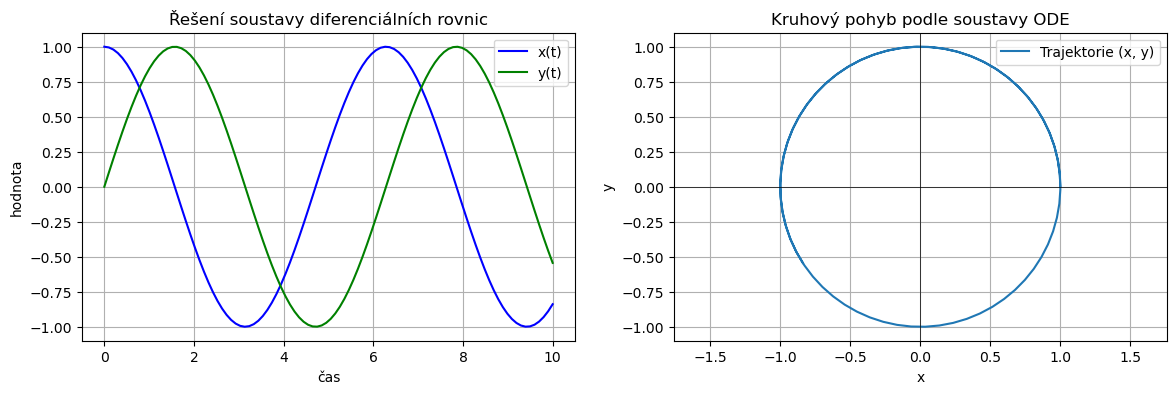

In [91]:
from sympy import lambdify
# Definice symbolických proměnných

x_t = solution_with_ics[0].rhs
y_t = solution_with_ics[1].rhs
print(x_t)

# Převod na numerické funkce (lambdify)
x_func = lambdify((t, x0, y0), x_t, modules="numpy")
y_func = lambdify((t, x0, y0), y_t, modules="numpy")

# Parametry (t je symbol, t_vals bude pole)
t_vals = np.linspace(0, 10, 100)  # Časové hodnoty

x0_val, y0_val = 1, 0             # Počáteční podmínky

# Vypočítáme trajektorii
x_vals = x_func(t_vals, x0_val, y0_val)
y_vals = y_func(t_vals, x0_val, y0_val)

vykresli(t_vals, [x_func(t_vals, x0_val, y0_val), y_func(t_vals, x0_val, y0_val)])


## Cvičení

#### Cvičení - výtok vody otvorem
Máme nádobu s vodou, která má otvor na dně. 

Předpokládejme, že voda z otvoru vytéká rychlostí úměrnou množství vody v láhvi. 

Množství vody v láhvi se postupně snižuje, což znamená, že rychlost, kterou voda vytéká, se také snižuje.

Eq(V(t), 10*exp(-0.1*t))


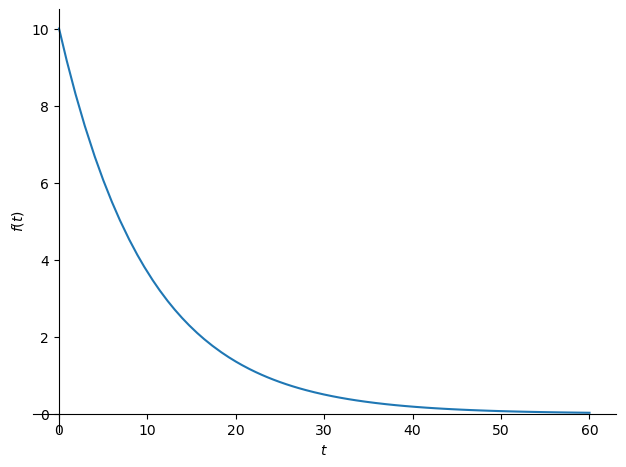

In [92]:
# pomocí sympy
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t = symbols('t')
k = symbols("k")
V = Function("V")                       # neznámá fce
k = 0.1
eq = Eq(V(t).diff(t), -k*V(t))          # rovnice dV/dt = -kV
sol = dsolve(eq, ics={V(0): 10})        # nutno zadat počáteční podmínku (zkuste, co se stane bez jejího zadání)
print(sol)
plot(sol.rhs,(t,0,60))

Jak se závislost změní, pokud konstanta k bude mít jiné znaménko?

#### Cvičení - Verhulstův populační model
Vyřešte následující diferenciální rovnici pomocí symbolické a numerické matematiky.
$$\frac{{\rm d} N(t)}{{\rm d}t} = rN(t)\left( 1 - \frac{N(t)}{K} \right)$$
kde $r=2$ a $K=50$ jsou konstanty (specifická míra růstu populace a horní hranice populace). 

Uvažujte počáteční podmínku $N(0) = 1$


Eq(N(t), 50/(1 + 49*exp(-2*t)))


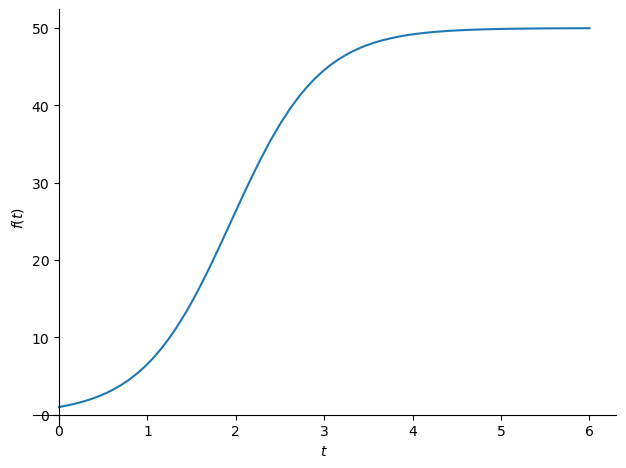

In [93]:
# pomocí sympy
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t = symbols('t')
r, K = symbols('r K', integers=True)
N = symbols('N', cls=Function)

r = 2
K = 50

eq = Eq(N(t).diff(t), r*N(t)*(1-N(t)/K))
sol = dsolve(eq, ics={N(0): 1})                 # N(0) = 1

print(sol)
plot(sol.rhs,(t,0,6))

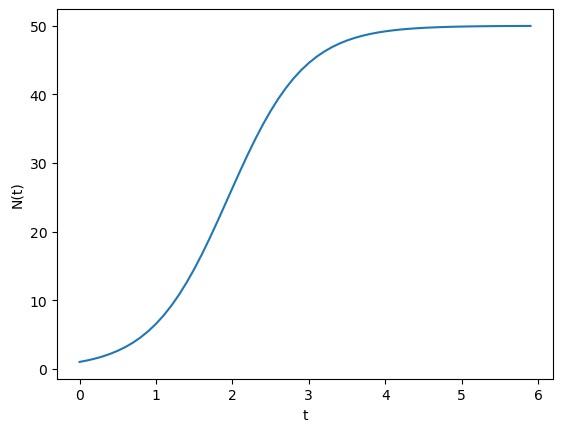

In [94]:
# numericky pomocí scipy
from scipy.integrate import odeint

def model(N, t, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

t0 = 0
N0 = 1
tmax = 6
dt = 0.1
r = 2
K = 50

t = np.arange(t0, tmax, dt)
N = odeint(model, N0, t, args=(r, K))

plt.plot(t,N)
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()

#### Cvičení - Nucené kmitání
Vyřešte následující soustavu diferenciální rovnici pomocí symbolické a numerické matematiky.

$$
\begin{align}
\frac{{\rm d} x}{{\rm d}t} = & v \\
\frac{{\rm d} x}{{\rm d}t} = & -\omega x - \beta\frac{{\rm d} x}{{\rm d}t} - F_0\sin(\Omega t)
\end{align}
$$
kde $\omega=1$, $\beta=0.05$, $F_0=2.0$ a $\Omega=0.63$.

Uvažujte počáteční podmínky jsou $x=3.0$, $v=0.0$.


Eq(x(t), (-2.00483019553968*sin(0.99968745115661*t) + 3.17273436804693*cos(0.99968745115661*t))*exp(-0.025*t) + 3.30717769425721*sin(0.63*t) - 0.172734368046928*cos(0.63*t))


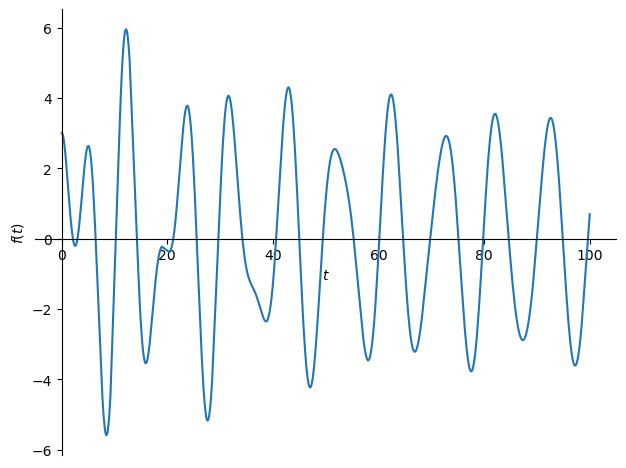

In [95]:
# analytické řešení - sympy
import sympy
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t, omega, beta, Omega, F0 = symbols('t omega beta Omega F0')
x = symbols('x', cls=Function)

x0 = 3.0            # poč. výchylka
v0 = 0.0            # poč. rychlost
omega = 1.0         # vlastní úhl. frekvence (čtverec)
beta = 0.05         # tlumení
Omega = 0.63        # budící úhl. frekvence
F0 = 2.0            # budící amplituda

# x"  = - omega*x - beta*x' - F0*sympy.sin(Omega*t)
v = Eq(x(t).diff(t, t), -omega*x(t) -beta*x(t).diff(t) + F0*sympy.sin(Omega*t))

#  initial/boundary condition set: slovník, klíč nezávisle proměnná
#y1 = dsolve(v, ics={x(0): x0, x(1): v0})
ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0}
y = dsolve(v, ics=ics)     

print(y)
plot(y.rhs,(t,0,100))

[[ 3.          0.        ]
 [ 2.98521775 -0.29275528]
 [ 2.94195581 -0.56857137]
 ...
 [ 0.26986584  2.13980006]
 [ 0.4824494   2.10619889]
 [ 0.69124841  2.06424118]]


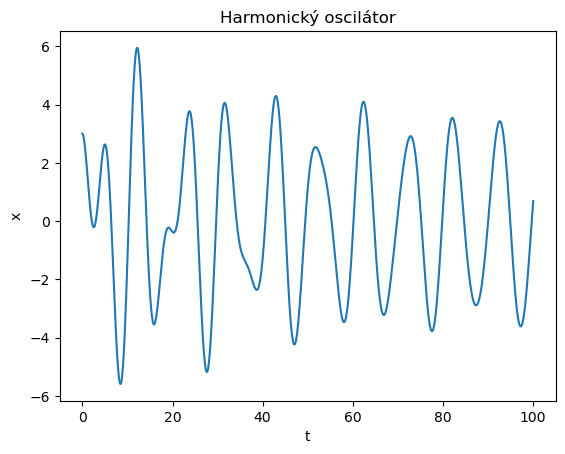

In [36]:
# numerické řešení - scipy a matplotlib
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def tlumene_kmitani(x0, v0, omega, beta, Omega, F0):

    # x' = v
    # v' = a  = - omega*x - beta*x' - F0*sympy.sin(Omega*t)
    def dUdt(U, t, omega, beta, Omega, F0):     # vrací [v, a]
        # U[0] = x
        # U[1] = v = dx/dt
        return [U[1], -omega*U[0] - beta*U[1] + F0*np.sin(Omega*t)]
    # U je dvojice [x, v]
    U0 = [x0, v0]
    t = np.linspace(0, 100, 1000)           # vektor nezávisle proměnné
    args=(omega, beta, Omega, F0)
                                            # parametry odeint: funkce, poč. bod, pole t
    U = odeint(dUdt, U0, t, args=args)      # funkce vrací [v=dx/dt, a=dv/dt=d2x/dt2]
    print(U)
    x = U[:,0]                              # získání x v daných časech z nasčítaných v=dx/dt

    plt.xlabel("t")
    plt.ylabel("x")
    plt.title("Harmonický oscilátor")
    plt.plot(t, x)

# omega = uhlova frekvence vlastniho kmitani
# beta = utlum vlastniho kmitani
# Omega = uhlova frekvence budici sily
# F0 = amplituda budici sily
# x0 = pocatecni vychylka vlastniho kmitani
# v0 = pocatecni rychlost vlastniho kmitani
tlumene_kmitani(x0=3.0, v0=0.0, omega=1.0, beta=0.05, Omega=0.63, F0=2.0)

[[ 0.          1.        ]
 [ 0.099933    0.99499417]
 [ 0.19886552  0.98002679]
 ...
 [-0.66773898  0.74439758]
 [-0.59000649  0.80740042]
 [-0.50636706  0.86231984]]


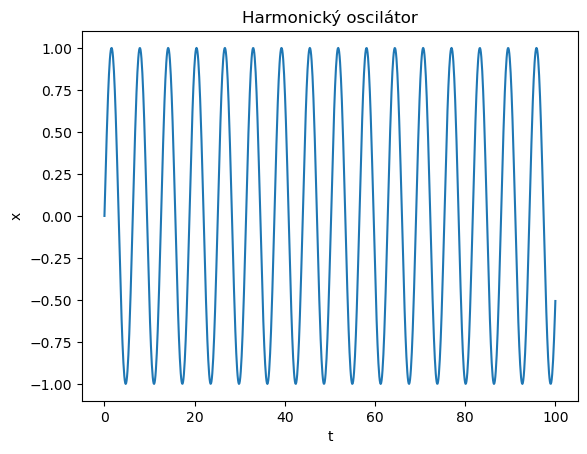

In [37]:
# netlumene kmitani (oscilator nenarazi do molekul prostredi a neztraci energii)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.0, F0=0.0)

[[ 0.          1.        ]
 [ 0.0994345   0.98506738]
 [ 0.1968881   0.96047051]
 ...
 [-0.00514637  0.00471824]
 [-0.00465154  0.00515951]
 [-0.0041153   0.00554499]]


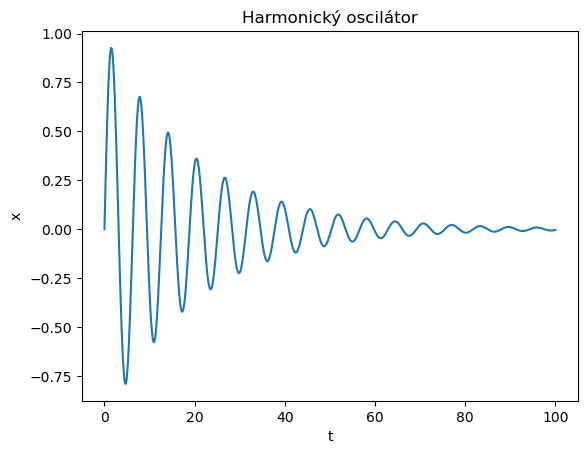

In [38]:
# tlumene kmitani nebuzene (oscilator narazi do molekul prostredi a ztraci energii)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.1, Omega=0.0, F0=0.0)

[[  0.           1.        ]
 [  0.10010001   0.99999567]
 [  0.20019749   0.99993309]
 ...
 [-38.14693307 -32.57564178]
 [-41.21457351 -28.66332976]
 [-43.87548939 -24.45597339]]


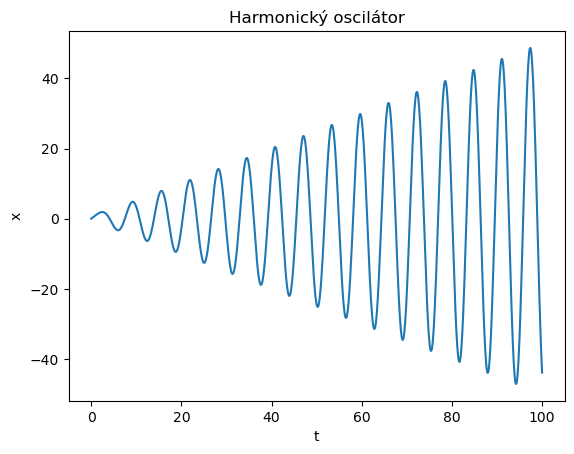

In [39]:
# netlumene kmitani buzene (oscilator nepredava energii, ale naopak ji ziskava od synchronizovane budici sily)
# rezonance
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=1.0, F0=1.0)

[[ 0.          1.        ]
 [ 0.09998313  0.99649581]
 [ 0.19926585  0.98601695]
 ...
 [-1.54157186  0.53020132]
 [-1.48584862  0.58227407]
 [-1.42518257  0.62889123]]
[[ 0.          1.        ]
 [ 0.10003325  0.99799744]
 [ 0.19966618  0.99200711]
 ...
 [-2.41540427  0.31600388]
 [-2.3816904   0.35714648]
 [-2.34399785  0.39546137]]


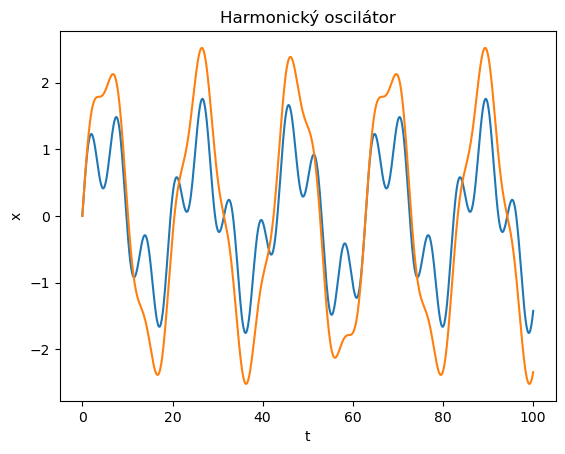

In [40]:
#netlumene kmitani buzene (oscilator nepredava energii, ale naopak ji ziskava od nesynchronizovane budici sily)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.3, F0=1.0)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.3, F0=2.0)

#### Cvičení - Vektorové pole
Zobrazte jednotlivá řešení následujících rovnic pomocí vektorového pole.
$$
\begin{align*}
  y^{\prime} =& x + y\\
  y^{\prime} =& -\frac{x}{y}\\
  y^{\prime} =& \frac{y^2}{x}
\end{align*}
$$


- Zvolte řešení $(x,y)$ v rozsahu $(-5,5)$
  - tj. specifikujeme hodnoty y pro x=0, pro které chceme řešení najít
- Pro řešení rovnic zvolte numerickou nebo symbolickou matematiku
- Vyznačte řešení, které vyhovuje vámi vybraným počátečním podmínkám



y0:-5 Eq(y_sym(x_sym), -x_sym - 4*exp(x_sym) - 1)
y0:-3 Eq(y_sym(x_sym), -x_sym - 2*exp(x_sym) - 1)
y0:0 Eq(y_sym(x_sym), -x_sym + exp(x_sym) - 1)
y0:3 Eq(y_sym(x_sym), -x_sym + 4*exp(x_sym) - 1)
y0:5 Eq(y_sym(x_sym), -x_sym + 6*exp(x_sym) - 1)


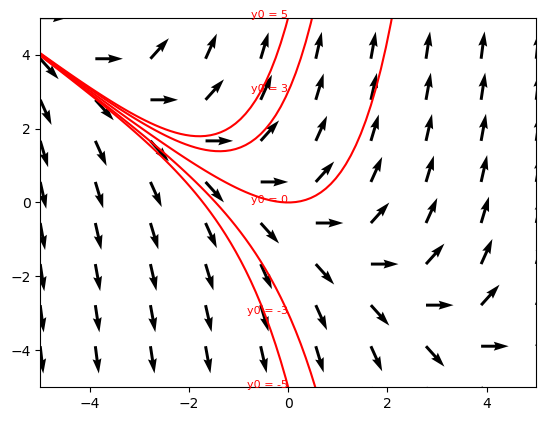

In [41]:
# y' = x + y
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, symbols, lambdify

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)                      # nastavení měřítka x
plt.ylim(xymin, xymax)                      # nastavení měřítka y

#reseni diferencialni rovnice
x = np.linspace(xymin, xymax, 100)          # pole x
y0s = [-5, -3, 0, 3, 5]                     # konkrétní ics v <-5, 5> (hodnoty y pro x = 0)
xs = symbols('x_sym')
ys = symbols('y_sym', cls=Function)
eq = Eq(ys(xs).diff(xs), xs + ys(xs))       # y' = x + y

# vykreslení konkrétních řešení 
for y0 in y0s:                              # přes jednotlivé ics
    sol = dsolve(eq, ics={ys(0): y0})       # řešíme rovnici s konkrétní počáteční podmínkou
    print(f"y0:{y0}", sol)
    y = lambdify(xs, sol.rhs)               # převede symbolickou funkci na numpy
    plt.plot(x, y(x), "r-")                 # řešení pro každou poč. podmínku (červeně)
    plt.text(0, y(0), f'y0 = {y0}', fontsize=8, color='red', ha='right')

# vektorové pole
nvec_on_row = 10                            # počet šipek na řádku
# pozice šipek (v obou směrech x,y stejný počet)
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))

U = 1                                       # směr doprava
V = X + Y                                   # y' = x + y (y' je rychlost)
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)                         # 2D pole šipek: X, Y umístění šipek, U, V směry

plt.show()

y0:-5 Eq(y_sym(x_sym), -sqrt(25 - x_sym**2))
y0:-3 Eq(y_sym(x_sym), -sqrt(9 - x_sym**2))


<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(9 - x_sym**2)


y0:1 Eq(y_sym(x_sym), sqrt(1 - x_sym**2))


<lambdifygenerated-12>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(1 - x_sym**2)


y0:3 Eq(y_sym(x_sym), sqrt(9 - x_sym**2))


<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(9 - x_sym**2)


y0:5 Eq(y_sym(x_sym), sqrt(25 - x_sym**2))


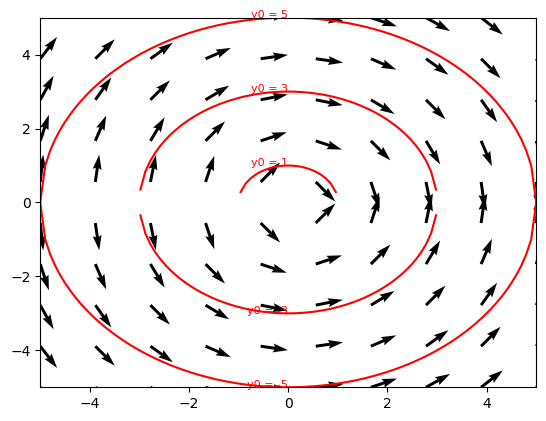

In [42]:
# y' = -x/y
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, symbols, lambdify

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)
plt.ylim(xymin, xymax)

#reseni diferencialni rovnice
x = np.linspace(xymin, xymax, 100)
y0s = [-5, -3, 1, 3, 5]
x_sym = symbols('x_sym')
y_sym = symbols('y_sym', cls=Function)
eq = Eq(y_sym(x_sym).diff(x_sym), -x_sym/y_sym(x_sym))
for y0 in y0s:
    sol = dsolve(eq, ics={y_sym(0): y0})
    print(f"y0:{y0}", sol)
    y = lambdify(x_sym, sol.rhs)
    plt.plot(x, y(x), "r-")
    plt.text(0, y(0), f'y0 = {y0}', fontsize=8, color='red', ha='right')

#vektorove pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = -X/Y
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

Eq(y(x), -1/(C1 + log(x)))
Eq(y(x), -1/(log(x) - 1))


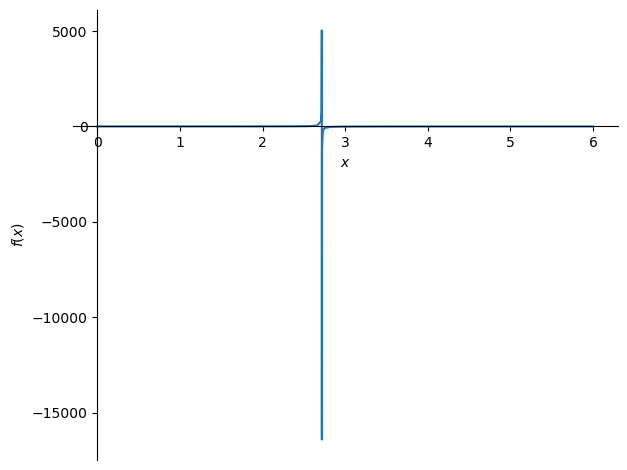

y0:0.1 Eq(y(x), -1/(log(x) - 10.0))
y0:3 Eq(y(x), -1/(log(x) - 1/3))


<lambdifygenerated-15>:2: RuntimeWarning: invalid value encountered in log
  return -1/(log(x) - 10.0)
<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in log
  return -1/(log(x) - 1/3)


y0:5 Eq(y(x), -1/(log(x) - 1/5))


<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in log
  return -1/(log(x) - 1/5)


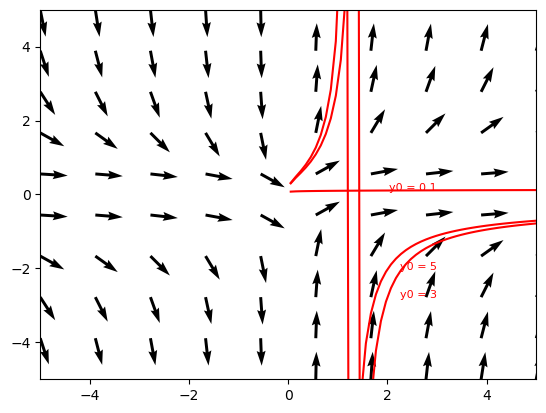

In [43]:
# y' = y^2/x
from sympy import symbols, Function, dsolve, lambdify
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

x = symbols('x')
y = Function('y')(x)

eq = y.diff(x) - y**2/x

solution = dsolve(eq, y)
print(solution)
sol = dsolve(eq, y, ics={y.subs(x, 1): 1})
print(sol)
plot(sol.rhs, (x, 0.0001, 6))

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)                      # nastavení měřítka x
plt.ylim(xymin, xymax)                      # nastavení měřítka y

xn = np.linspace(xymin, xymax, 100)          # pole x
y0s = [0.1, 3, 5]                     # konkrétní ics v <-5, 5> (hodnoty y pro x = 0)


for y0 in y0s:
    sol = dsolve(eq, y, ics={y.subs(x, 1): y0})
    print(f"y0:{y0}", sol)
    yn = lambdify(x, sol.rhs)
    plt.plot(xn, yn(xn), "r-")
    plt.text(3, yn(2), f'y0 = {y0}', fontsize=8, color='red', ha='right')

#vektorove pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = Y*Y/X
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

/usr/lib/python3/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


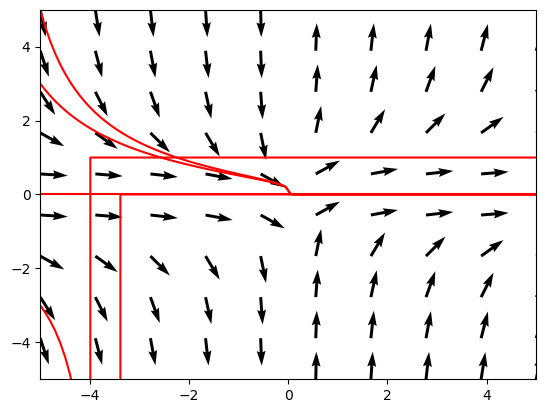

In [44]:
# y' = y^2/x
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# sympy úplně selže při řešení této rovnice :)

def model(y, x):
    dydx = y**2/x
    return dydx

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)
plt.ylim(xymin, xymax)

# řešení diferencialni rovnice
x = np.linspace(xymin, xymax, 100)
y0s = [-5, -3, 0, 3, 5]
for y0 in y0s:
    y = odeint(model, y0, x)
    #print(y)
    plt.plot(x, y, "r-")

# vektorové pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = Y**2/X
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

#### Eulerova metoda
řešíme rovnici $y'=0.05y$

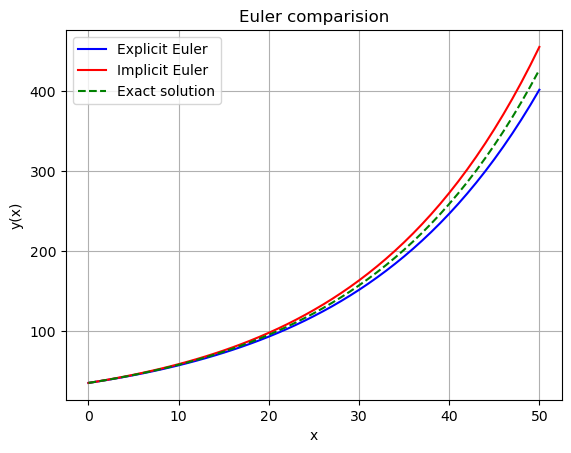

In [45]:
# numericky pomocí vlastního kódu
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(f, xmin, xmax, dx, y0, label):       # funkce, od, do, dx, y0, popis
    x = np.arange(xmin, xmax+dx, dx)
    yexpl = np.zeros(len(x))
    yexpl[0] = y0
    for i in range(0, len(x) - 1):
        yexpl[i+1] = yexpl[i] + dx*f(x[i], yexpl[i])
    plt.plot(x, yexpl, 'b-', label=label)
    return yexpl
    

def implicit_euler(f, xmin, xmax, dx, y0, label):

    def fixed_point_iteration(f, yi, xi_next, dx, niterations):
        yi_next = yi
        for i in range(niterations):
            yi_next = yi + dx*f(xi_next, yi_next)
        return yi_next

    x = np.arange(xmin, xmax+dx, dx)
    yimpl = np.zeros(len(x))
    yimpl[0] = y0
    for i in range(0, len(x) - 1):
        yi_next = fixed_point_iteration(f, yimpl[i], x[i+1], dx, 10) # = yimpl[i+1] aprox
        yimpl[i+1] = yimpl[i] + dx*f(x[i+1], yi_next)
    plt.plot(x, yimpl, 'r-', label=label)
    return yimpl

def presne(xmin, xmax, dx, y0, label):
    x = np.arange(xmin, xmax+dx, dx)
    y = y0*np.exp(0.05*x)
    plt.plot(x, y, 'g--', label=label)


explicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Explicit Euler")
implicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Implicit Euler")
presne(xmin=0, xmax=50, dx=1, y0=35, label="Exact solution")

plt.title('Euler comparision')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend()
plt.show()

#### Cvičení - Euler
<font color="green">U následující rovnice nejdříve odvoďte a poté aplikujte implicitní i explicitní Eulerovu metodu. 

Postupně změňte krok *h* a sledujte přesnost a stabilitu obou metod, např. pomocí globální chyby. 

Počáteční podmínka je</font> $\color{green} y(0) = y_0 = 0$.

$$y^{\prime} = -100y + 100$$


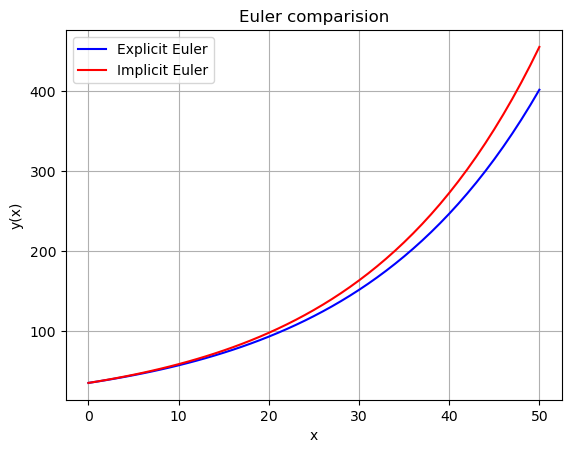

In [46]:
explicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Explicit Euler")
implicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Implicit Euler")

plt.title('Euler comparision')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend()
plt.show()

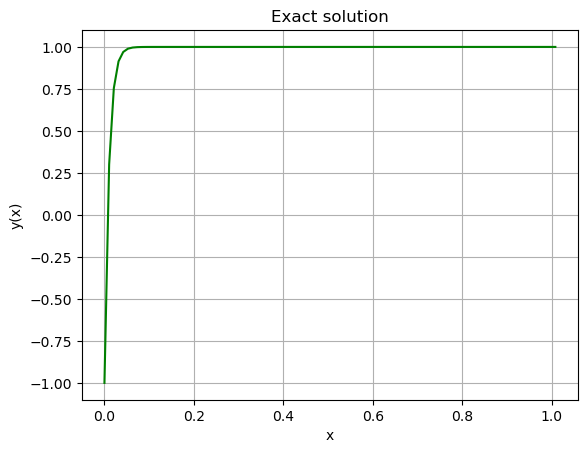

In [47]:
# přesné řešení
xmin=0
xmax=1
dx=0.0105

x = np.arange(xmin, xmax+dx, dx)
f_exact = lambda x: 1 - 2*np.exp(-100*x)
y_exact = f_exact(x)

plt.plot(x, y_exact, 'g-')

plt.title('Exact solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

Global error:  1.1718665216162698


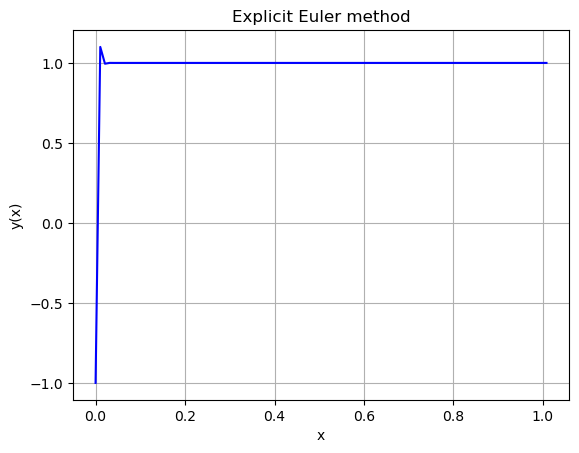

In [48]:
# Euler (explicitní)
y_expl = explicit_euler(f=lambda x, y: -100*y + 100, xmin=0, 
            xmax=1, dx=0.0105, y0=-1, label="Explicit Euler")

print("Global error: ", np.sum(np.abs(y_exact - y_expl)))

plt.title('Explicit Euler method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

Global error:  1.7876131253665077


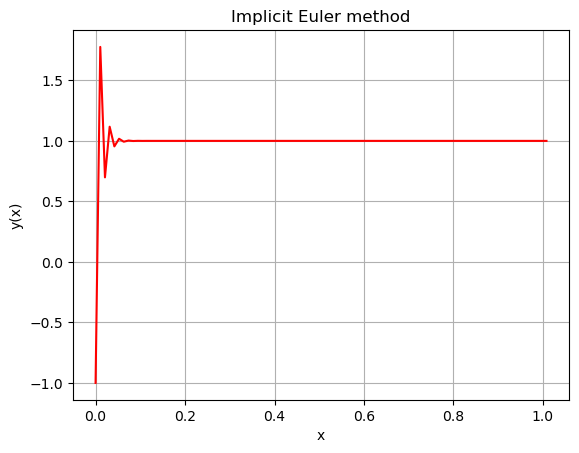

In [49]:
# Euler implicitní
y_impl = implicit_euler(f=lambda x, y: -100*y + 100, xmin=0, 
            xmax=1, dx=0.0105, y0=-1, label="Explicit Euler")

print("Global error: ", np.sum(np.abs(y_exact - y_impl)))

plt.title('Implicit Euler method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

#### Stiff ODE solver

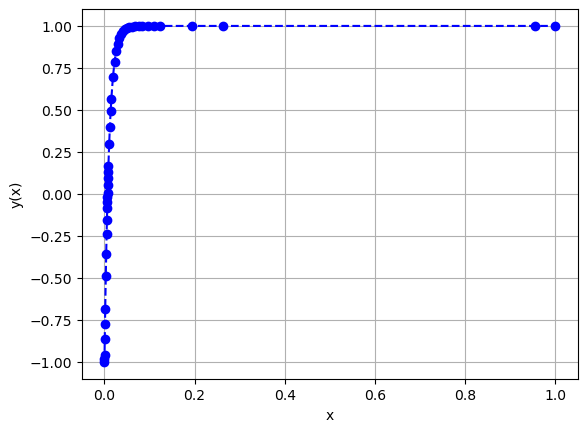

In [50]:
# numericky pomocí scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def model(x, y):
    return -100*y + 100

y0 = -1
xmin = 0
xmax = 1

sol = solve_ivp(model, [xmin, xmax], [y0], method='BDF', first_step =0.0001, dense_output=True)
#print(sol)

plt.plot(sol.t, sol.y[0], 'bo--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

#### Cvičení - Stiff
<font color="green">U následující soustavy rovnic nejdříve vypočítejte její koeficient tuhosti a poté pomocí implicitní a explicitní Eulerovy metody soustavu vyřešte. 

Počáteční podmínky jsou </font> $\color{green}y(0) = y_0 = 0$ <font color="green">a</font> $\color{green}z(0) = z_0 = 0$.
\begin{align*}
  y^{\prime} &=&998y + 1998z \\
  z^{\prime} &=-&999y - 1999z 
\end{align*}


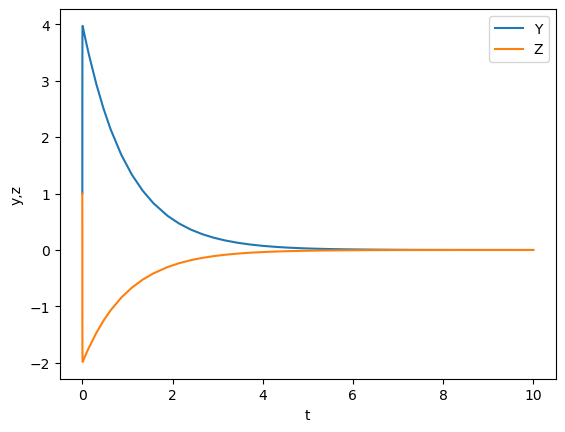

In [51]:
# numericky pomocí scipy
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def deriv(t, k):
    y, z = k
    dy = 998*y + 1998*z
    dz = -999*y - 1999*z
    return dy, dz

xmin, xmax = 0, 10

y0 = 1
z0 = 1
k = y0, z0

soln = solve_ivp(deriv, (xmin, xmax), k, method='BDF', first_step =0.0001, dense_output=True)

plt.plot(soln.t, soln.y[0], label='Y')
plt.plot(soln.t, soln.y[1], label='Z')
plt.xlabel('t')
plt.ylabel('y,z')
plt.legend()
plt.show()

#### Fyzikální model - ochlazování tělesa

Za jak dlouho se ochladí kovové těleso z počáteční teploty $T_t^0 = 120^\circ$ C na konečnou teplotu $T_f = 30^\circ$ C, jestliže je těleso obklopeno vzduchem s $T_p = 20^\circ$ C? 

Ohřev okolního vzduchu neuvažujeme.


- Rozměry tělesa:
 
  - $a=0.1~m,~b=0.05~m,~c=0.01~m$.
  - $A = 0.013~m^2$.
  - $V = 5\cdot10^{-5}~m^3$.

- Koeficient přestupu tepla $h = 0.85~W/(m^2K)$.
- Tepelná kapacita $C = 0.175~J/K$.
- Určíme konstantu $B =\frac{hA}{C} = 0.06~s^1$.


$𝑑𝑇_𝑡/𝑑𝑡=−𝐵 (𝑇_𝑡−𝑇_𝑝)$

In [52]:
# Definice konstant
T_p = 20    # Teplota okolí [°C]
T_f = 30    # Konečná teplota tělesa [°C]
T_0 = 120   # Počáteční teplota tělesa [°C]
B = 0.06    # Konstanta z Newtonova zákona ochlazování [1/s]

# Délka kroku
dt = 0.1  # [s]


In [53]:
# Výpočet času pomocí Eulerovy metody
t = 0       # Inicializace času, teploty a počtu kroků
T = T_0
steps = 0

# Eulerova metoda pro numerické řešení diferenciální rovnice
while T > T_f:
    dTdt = -B * (T - T_p)
    T += dTdt * dt
    t += dt
    steps += 1

# Výsledky
print(f"Těleso se ochladí na {T_f}°C za {t:.2f} sekund ({steps} kroků).")


Těleso se ochladí na 30°C za 38.30 sekund (383 kroků).


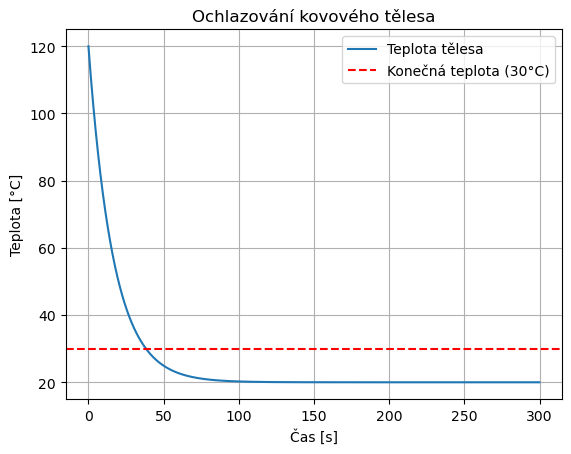

In [54]:
# Vykreslení grafu pomocí Eulerovy metody (stejná úloha, ulození do pole)
import numpy as np
import matplotlib.pyplot as plt

t_max = 300     # Maximální čas [s]

# Vytvoření pole časů
times = np.arange(0, t_max, dt)

# Inicializace pole teplot (pro vykreslení)
temperatures = np.zeros_like(times)
temperatures[0] = T_0

# Eulerova metoda pro výpočet teploty
for i in range(1, len(times)):
    dTdt = -B * (temperatures[i-1] - T_p)             # dTdt = -B * (T - T_p)
    temperatures[i] = temperatures[i-1] + dTdt * dt   # T += dTdt * dt

# Vykreslení vývoje teploty v čase
plt.plot(times, temperatures, label='Teplota tělesa')
plt.xlabel('Čas [s]')
plt.ylabel('Teplota [°C]')
plt.title('Ochlazování kovového tělesa')
plt.axhline(T_f, color='red', linestyle='--', label=f'Konečná teplota ({T_f}°C)')
plt.legend()
plt.grid(True)
plt.show()


Eq(T(t), C1*exp(-0.06*t) + 20.0)

Eq(T(t), 20.0 + 100.0*exp(-0.06*t))

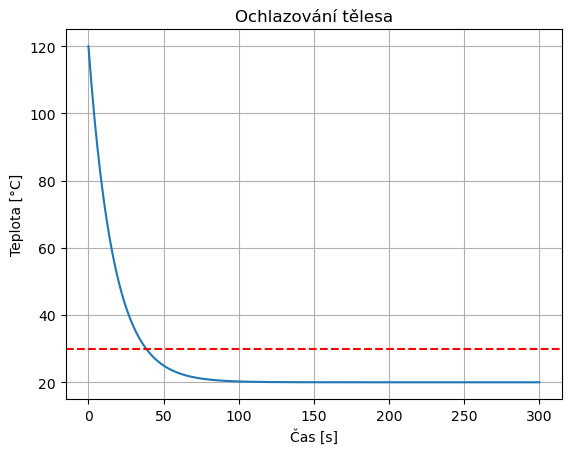

20.0 + 100.0*exp(-0.06*t)

Řešení diferenciální rovnice:


[38.3764182165674,
 38.3764182165674 - 104.71975511966*I,
 38.3764182165674 + 104.71975511966*I]

In [55]:
# Pomocí symbolické matematiky (stejná úloha)
import sympy as sp

# Definice symbolických proměnných
t = sp.symbols('t')
T = sp.Function('T')(t)

# Definice diferenciální rovnice
diffeq = sp.Eq(sp.Derivative(T, t), -B * (T - T_p))

# Řešení diferenciální rovnice
g_solution = sp.dsolve(diffeq, T)                           # řešení bez poč. podmínky
display(g_solution)
solution = sp.dsolve(diffeq, ics={T.subs(t,0): T_0})        # nutno zadat počáteční podmínku
display(solution)

# Vytvoření funkce pro teplotu
T_func = sp.lambdify(t, solution.rhs, 'numpy')

# Výpočet teploty pro dané časy
times = np.linspace(0, 300, 300)  # časy v sekundách
temperatures = T_func(times)

# Vykreslení výsledků
import matplotlib.pyplot as plt

plt.plot(times, temperatures)
plt.xlabel('Čas [s]')
plt.ylabel('Teplota [°C]')
plt.title('Ochlazování tělesa')
plt.axhline(T_f, color='red', linestyle='--', label=f'Konečná teplota ({T_f}°C)')
plt.grid(True)
plt.show()

# Výpočet času
display(solution.rhs)
equation = sp.Eq(solution.rhs, T_f)
# Vyřešení rovnice pro t
solution = sp.solve(equation, t)

# Výpis řešení
print("Řešení diferenciální rovnice:")
display(solution)


#### Chemický model - chemická kinetika
Chemická kinetika popisuje rychlost chemické reakce komponent a popisuje závislost rychlosti reakce na parametrech a podmínkách, při kterých probíhá. 

Jde například o počet molekul $n$, které se reakce účastní, objem ve kterém, se reakce odehrává $V$ nebo čas $t$, po který reakce probíhá.

Rychlost reakce $v$ se dá vyjádřit jako změna počtu molů látky $\Delta n$ v objemu $V$ za čas $t$.

$$v =\frac{|\Delta n|}{V\Delta t} \rightarrow \lim_{\Delta t \rightarrow 0} \frac{|\Delta n|}{V\Delta t} = \left| \frac{{\rm d} n}{ V{\rm d} t} \right|$$

Pokud je $V = konst$, lze rovnici přepsat do tvaru

$$\frac{{\rm d}n}{V{\rm d}t} = \frac{{\rm d}c}{{\rm d}t} \rightarrow \frac{{\rm d}n}{V} = {\rm d}c$$

kde $c$ je koncentrace látky v čase $t$.

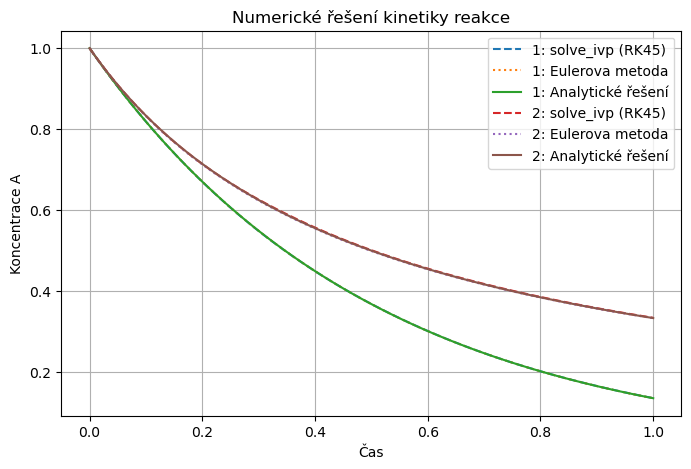

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definice rychlostní rovnice
def reaction1(t, A, k):
    return -k * A
def reaction2(t, A, k):
    return -k * A**2

# Počáteční podmínky
A0 = 1.0  # Počáteční koncentrace reaktantu
k = 2    # Rychlostní konstanta

t_span = (0, 1)  # Časový interval
num_points = 100  # Počet bodů pro Eulerovu metodu
t_eval = np.linspace(t_span[0], t_span[1], num_points)

# Numerické řešení pomocí solve_ivp
sol1 = solve_ivp(reaction1, t_span, [A0], args=(k,), t_eval=t_eval)
sol2 = solve_ivp(reaction2, t_span, [A0], args=(k,), t_eval=t_eval)

# Eulerova metoda
dt = (t_span[1] - t_span[0]) / num_points
t_euler = np.linspace(*t_span, num_points)
A_euler1 = np.zeros(num_points)
A_euler1[0] = A0
A_euler2 = np.zeros(num_points)
A_euler2[0] = A0

for i in range(1, num_points):
    A_euler1[i] = A_euler1[i-1] + reaction1(t_euler[i-1], A_euler1[i-1], k) * dt
    A_euler2[i] = A_euler2[i-1] + reaction2(t_euler[i-1], A_euler2[i-1], k) * dt

# Analytické řešení
A_analytical1 = A0 * np.exp(-k * t_eval)
A_analytical2 = A0/(1 + A0*k*t_eval)

# Grafické znázornění
plt.figure(figsize=(8, 5))

plt.plot(sol1.t, sol1.y[0], label='1: solve_ivp (RK45)', linestyle='dashed')
plt.plot(t_euler, A_euler1, label='1: Eulerova metoda', linestyle='dotted')
plt.plot(t_eval, A_analytical1, label='1: Analytické řešení', linestyle='solid')

plt.plot(sol2.t, sol2.y[0], label='2: solve_ivp (RK45)', linestyle='dashed')
plt.plot(t_euler, A_euler2, label='2: Eulerova metoda', linestyle='dotted')
plt.plot(t_eval, A_analytical2, label='2: Analytické řešení', linestyle='solid')

plt.xlabel('Čas')
plt.ylabel('Koncentrace A')
plt.legend()
plt.title('Numerické řešení kinetiky reakce')
plt.grid()
plt.show()


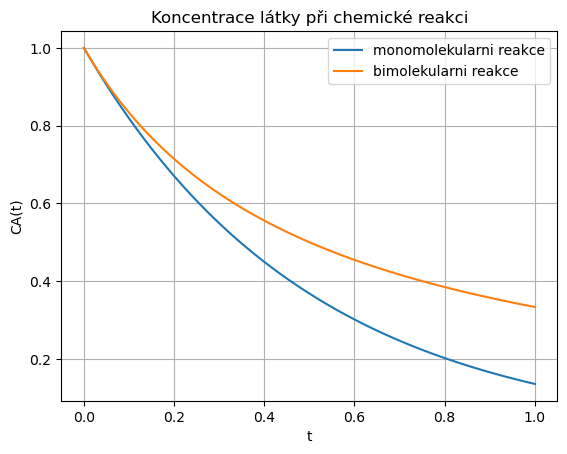

In [57]:
# Vykreslení analyticky
tmin=0
tmax=1
dt = 0.01
t = np.arange(tmin, tmax+dt, dt)

k = 2
CA0 = 1

f_mono = lambda t,k,CA0: CA0*np.exp(-k*t)
CA_mono = f_mono(t,k, CA0)

f_bi = lambda t,k,CA0: CA0/(1+CA0*k*t)
CA_bi = f_bi(t,k, CA0)

# Vizualizace
plt.plot(t, CA_mono, label="monomolekularni reakce")
plt.plot(t, CA_bi, label="bimolekularni reakce")

plt.title('Koncentrace látky při chemické reakci')
plt.xlabel('t')
plt.ylabel('CA(t)')
plt.grid()
plt.legend()
plt.show()

#### Biologický model - šíření nemocí s konstantní infekčností


- Počet nemocných jedinců $D$ roste s konstantní mírou infekce $a$,
- každá infikovaná osoba má konstantní pravděpodobnost $b$, že se vyléčí.

Změnu počtu nakažených osob lze popsat rovnicí
$$\frac{{\rm d}D}{{\rm d}t} = a-bD$$

která má analytické řešení
$$D(t) = \frac{1}{b}\left( a- e^{-b(C+t)} \right)$$

kde $C = -\ln(a-bD(0))/b$ je integrační konstanta. Model má dále rovnovážné řešení ve tvaru
$$\frac{{\rm d}D}{{\rm d}t}=0 \rightarrow D_0 = \frac{a}{b}$$


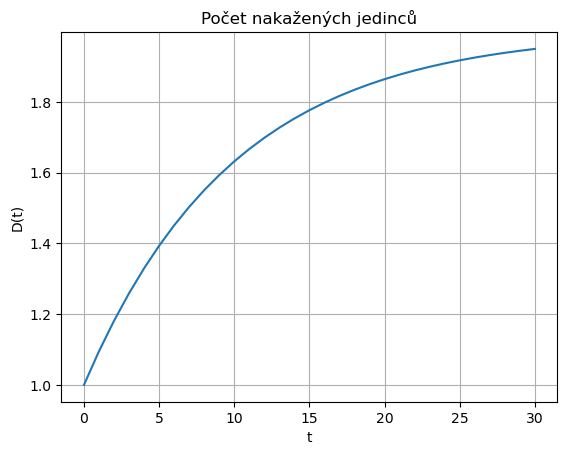

In [96]:
tmin=0
tmax=30
dt = 1

b = 0.1
a = 0.2
D0 = 1
C = -np.log(a-b*D0)/b

t = np.arange(tmin, tmax+dt, dt)
f = lambda t,a,b,C: 1/b*(a-np.exp(-b*(C+t)))
D = f(t, a, b, C)

# Vizualizace
plt.plot(t, D)

plt.title('Počet nakažených jedinců')
plt.xlabel('t')
plt.ylabel('D(t)')
plt.grid()
plt.show()

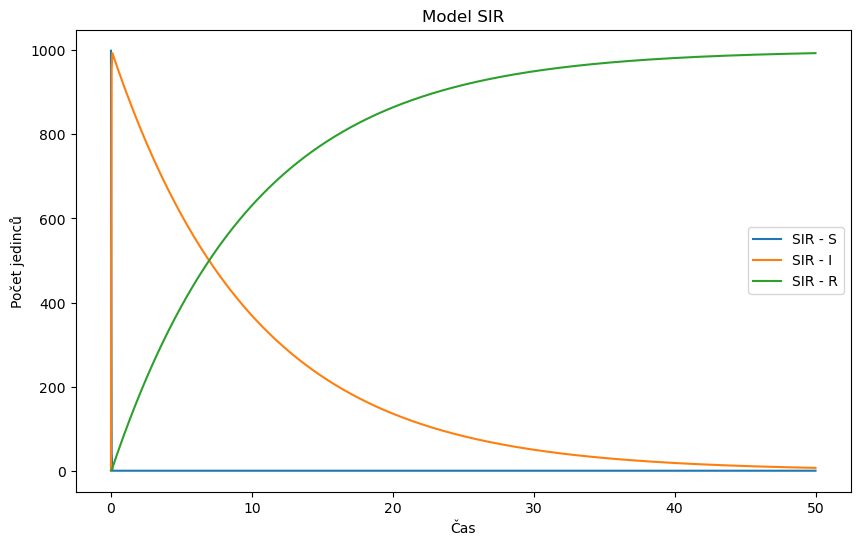

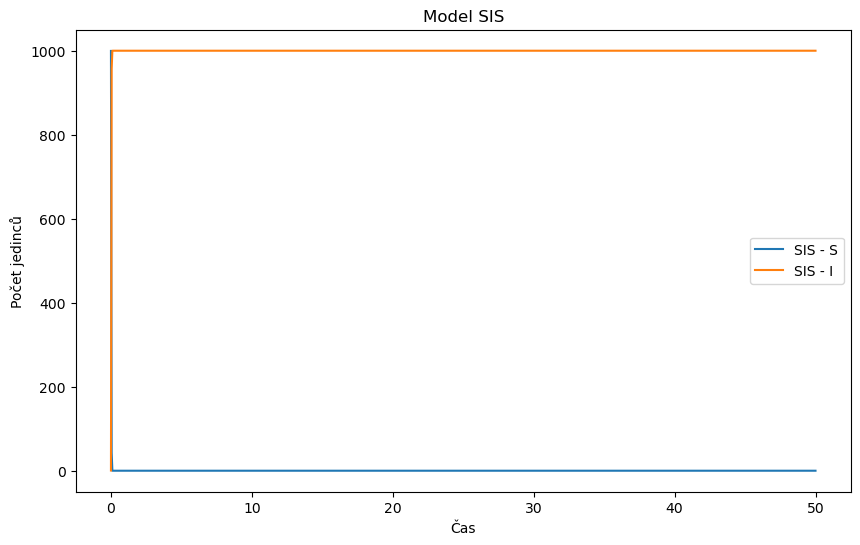

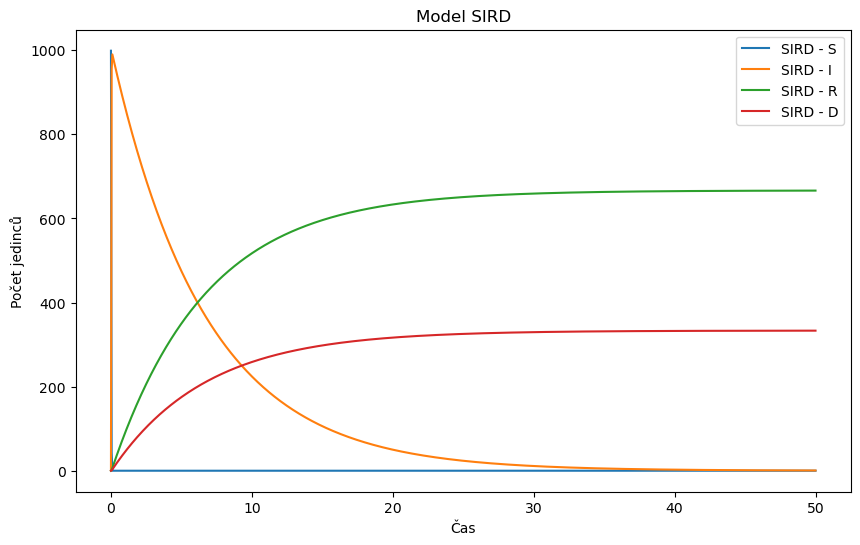

In [97]:
# numericky pomocí scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I                            # dS/dt = -βSI
    dIdt = beta * S * I - gamma * I                 # dI/dt = βSI - γI
    dRdt = gamma * I                                # dR/dt = γI
    return [dSdt, dIdt, dRdt]

def sis_model(t, y, beta, gamma):
    S, I = y
    dSdt = -beta * S * I + gamma * I                # dS/dt = -βSI + γI
    dIdt = beta * S * I - gamma * I                 # dI/dt = βSI - γI
    return [dSdt, dIdt]

def sird_model(t, y, beta, gamma, delta):
    S, I, R, D = y
    dSdt = -beta * S * I                            # dS/dt = -βSI
    dIdt = beta * S * I - gamma * I - delta * I     # dI/dt = βSI - γI - μI
    dRdt = gamma * I                                # dR/dt = γI
    dDdt = delta * I                                # dD/dt = μI
    return [dSdt, dIdt, dRdt, dDdt]

# Parametry modelů
beta = 0.2          # parametr šíření viru
gamma = 0.1         # parametr uzdravování
delta = 0.05        # parametr úmrtí infikovaných
N = 1000            # počet lidí
I0 = 1              # infikovaných v t=0
R0 = 0              # uzdravených v t=0

# Řešení modelů SIR, SIS, SIRD, SIRDV
t_span = [0, 500]
t_eval = np.linspace(0, 50, 1000)

# SIR model
sol_sir = solve_ivp(sir_model, t_span, [N - I0, I0, R0], args=(beta, gamma), t_eval=t_eval)
S_sir, I_sir, R_sir = sol_sir.y

# SIS model
sol_sis = solve_ivp(sis_model, t_span, [N - I0, I0], args=(beta, gamma), t_eval=t_eval)
S_sis, I_sis = sol_sis.y

# SIRD model
sol_sird = solve_ivp(sird_model, t_span, [N - I0 - R0, I0, R0, 0], args=(beta, gamma, delta), t_eval=t_eval)
S_sird, I_sird, R_sird, D_sird = sol_sird.y

# Vykreslení výsledků
plt.figure(figsize=(10, 6))
plt.plot(sol_sir.t, S_sir, label='SIR - S')
plt.plot(sol_sir.t, I_sir, label='SIR - I')
plt.plot(sol_sir.t, R_sir, label='SIR - R')
plt.xlabel('Čas')
plt.ylabel('Počet jedinců')
plt.title('Model SIR')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sol_sis.t, S_sis, label='SIS - S')
plt.plot(sol_sis.t, I_sis, label='SIS - I')
plt.xlabel('Čas')
plt.ylabel('Počet jedinců')
plt.title('Model SIS')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sol_sird.t, S_sird, label='SIRD - S')
plt.plot(sol_sird.t, I_sird, label='SIRD - I')
plt.plot(sol_sird.t, R_sird, label='SIRD - R')
plt.plot(sol_sird.t, D_sird, label='SIRD - D')
plt.xlabel('Čas')
plt.ylabel('Počet jedinců')
plt.title('Model SIRD')
plt.legend()
plt.show()

#### Ekonomický model - spotřeba domácností
Model má za cíl popsat vývoj spotřeby domácností v závislosti na míře růstu $k$ a času, po který k růstu dochází. 

Růst je ovlivněn zejména výdaji na


- dlouhodobou spotřebu (spotřebiče, nábytek atd.),
- krátkodobou spotřebu (potraviny, oblečení atd.),
- služby (nájem atd.)


Mějme celkovou spotřebu domácností $C$, která roste v konstantní míře 3 \%, tj. $k=0.03$, poté následující rovnice popisuje vývoj spotřeby v čase $C^{\prime}$.

\begin{align*}
  \frac{C^{\prime}}{C} =& k \\
   \frac{{\rm d}C}{C} =& k{\rm d}t \\
   \ln |C| =& kt\\
   \textcolor{red}{C =}& \textcolor{red}{c\cdot e^{kt}}
\end{align*}

kde konstanta $c$ udává míru růstu.

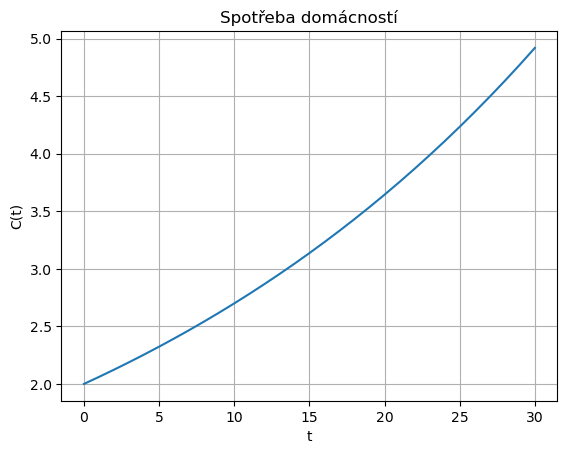

In [60]:
tmin=0
tmax=30
dt = 1

k = 0.03
c = 2

t = np.arange(tmin, tmax+dt, dt)
f = lambda t,c,k: c*np.exp(k*t)
C = f(t, c, k)

# Vizualizace
plt.plot(t, C)

plt.title('Spotřeba domácností')
plt.xlabel('t')
plt.ylabel('C(t)')
plt.grid()
plt.show()

#### Cvičení - ODE 2. řádu
<font color="green">Porovnejte přesná řešení předchozího příkladu s numerickým odhadem, například pomocí explicitní a implicitní Eulerovy metody.

Soustava rovnic má tvar
\begin{align*}
  y^{\prime} =& z(x)\\
  z^{\prime} =& \ln x
\end{align*}

a přesná řešení mají pro jednotlivé rovnice tvar

\begin{align*}
  y(x) =& \frac{x^2}{2} \left( \ln x - \frac{3}{2} \right)\\
  z(x) =& x\ln x -x + c
\end{align*}
</font>

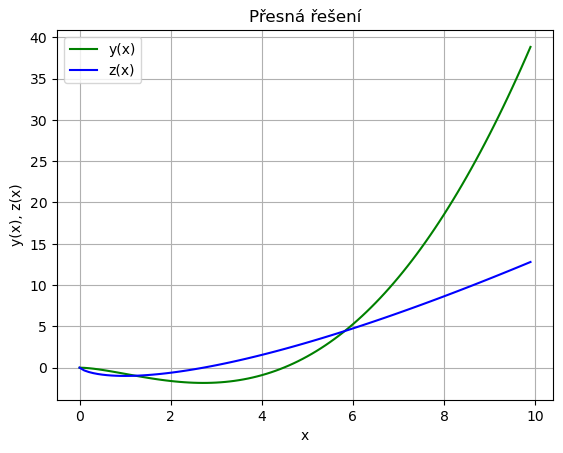

In [61]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0.0000000000001      # x > 0 kvůli logaritmu
xmax = 10
dx = 0.1
x = np.arange(xmin, xmax, dx)

y = lambda x: x**2/2*(np.log(x)-3/2)
z = lambda x, c: x*np.log(x) - x + c

c = 0
# Vizualizace
plt.plot(x, y(x), 'g-', label="y(x)")
plt.plot(x, z(x, c), 'b-', label="z(x)")
plt.title('Přesná řešení')
plt.xlabel('x')
plt.ylabel('y(x), z(x)')
plt.grid()
plt.legend()
plt.show()

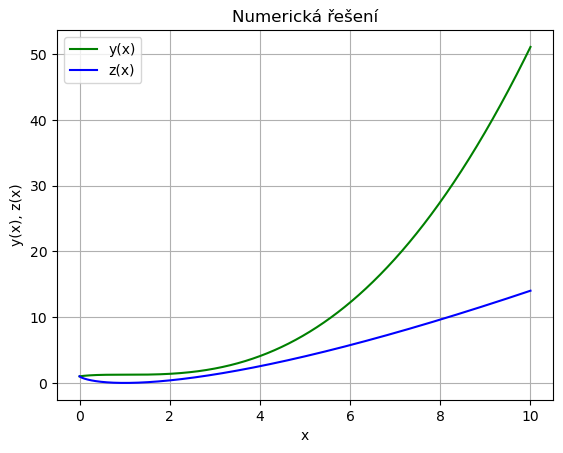

In [62]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0.0000000000001
xmax = 10
dx = 0.0001
x = np.arange(xmin, xmax, dx)
y = np.zeros(len(x))
z = np.zeros(len(x))

y[0] = 1
z[0] = 1

fy = lambda z: z
fz = lambda x: np.log(x)

for i in range(0, len(x) - 1):
    y[i+1] = y[i] + dx*fy(z[i])
    z[i+1] = z[i] + dx*fz(x[i])

plt.plot(x, y, 'g-', label='y(x)')
plt.plot(x, z, 'b-', label='z(x)')
plt.title('Numerická řešení')
plt.xlabel('x')
plt.ylabel('y(x), z(x)')
plt.grid()
plt.legend()
plt.show()


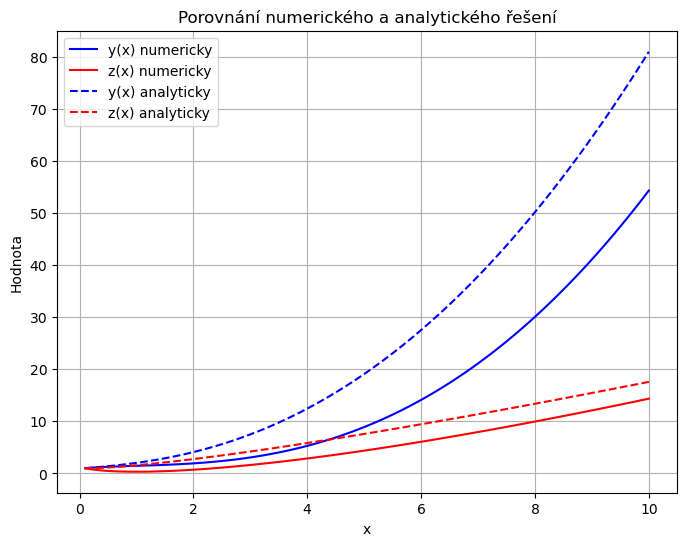

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definujeme diferenciální rovnice
def system(x, Y):
    y, z = Y
    dydx = z
    dzdx = np.log(x)
    return [dydx, dzdx]

# Počáteční podmínky
x0 = 0.1
y0 = 1
z0 = 1
x_end = 10
x_span = (x0, x_end)
x_eval = np.linspace(x0, x_end, 100)

# Numerické řešení
sol = solve_ivp(system, x_span, [y0, z0], t_eval=x_eval)

# Analytická řešení (odvozená dříve)
C1 = y0 - (x0**2 * np.log(x0) / 4) - (x0**2 / 8) - x0
C2 = z0 - (x0 * np.log(x0) / 2) - (x0 / 2)

x_analytical = np.linspace(x0, x_end, 100)
y_analytical = (x_analytical**2 * np.log(x_analytical) / 4) + (x_analytical**2 / 8) + C1 + x_analytical
z_analytical = (x_analytical * np.log(x_analytical) / 2) + (x_analytical / 2) + C2

# Vykreslení
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], 'b-', label='y(x) numericky')
plt.plot(sol.t, sol.y[1], 'r-', label='z(x) numericky')
plt.plot(x_analytical, y_analytical, 'b--', label='y(x) analyticky')
plt.plot(x_analytical, z_analytical, 'r--', label='z(x) analyticky')
plt.xlabel('x')
plt.ylabel('Hodnota')
plt.legend()
plt.title('Porovnání numerického a analytického řešení')
plt.grid()
plt.show()


#### Zombie apokalypsa

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html

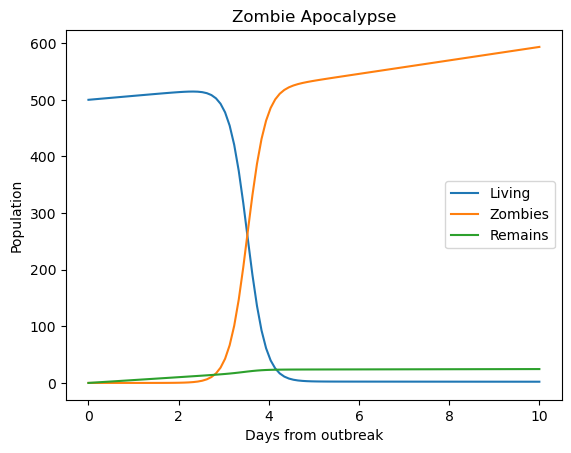

In [98]:
# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import odeint


# solve the system dy/dt = f(y, t)
def f(y, t, paras):

    Si = y[0]                   # Aktuální počet živých lidí (náchylných obětí)
    Zi = y[1]                   # Aktuální počet zombie
    Ri = y[2]                   # Aktuální počet mrtvých

    try:
        P = paras['P'].value    # P Míra porodnosti
        d = paras['d'].value    # d Míra přirozené úmrtnosti (denně)
        B = paras['B'].value    # B Míra přenosu (denně) - živá osoba se stává zombie
        G = paras['G'].value    # G Míra oživení (denně) - mrtvý člověk je vzkříšen do zombie
        A = paras['A'].value    # A Míra zničení (denně) - zombie zcela zničena

    except:
        P, d, B, G, A = paras
        
    # the model equations (see Munz et al. 2009)
    dSdt = P - B*Si*Zi - d*Si             # dS/dt, změna populace živých lidí
    # f0: změna populace živých  v závislosti na porodnosti (P), úmrtnosti (d) a interakci se zombiemi (B)

    dZdt = B*Si*Zi + G*Ri - A*Si*Zi       # dZ/dt, změna populace zombie
    # f1: změna populace zombie v závislosti na interakci s živými lidmi a mrtvými

    dRdt = d*Si + A*Si*Zi - G*Ri          # dR/dt, změna populace mrtvých
    # f2: změna populace mrtvých

    return [dSdt, dZdt, dRdt]


# Počáteční podmínky
S0 = 500.               # Počáteční populace živých lidí
Z0 = 0                  # Počáteční populace zombie
R0 = 0                  # Počáteční populace mrtvých
y0 = [S0, Z0, R0]       # Počáteční stav systému
t = np.linspace(0, 10., 100)         # Časová osa

P = 12      # Míra porodnosti - birth rate
d = 0.01  # Míra přirozené úmrtnosti (denně) - natural death percent (per day)
B = 0.0095  # Míra přenosu (denně) - transmission percent  (per day)
G = 0.0001  # Míra oživení (denně) - resurect percent (per day)
A = 0.0001  # Míra zničení (denně) - destroy percent  (per day)

# Řešení ODE
soln = odeint(f, y0, t, args=((P, d, B, G, A), ))
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Vizualizace
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.plot(t, R, label='Remains')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse')      #  - No Init. Dead Pop.; No New Births.
plt.legend(loc=0)
plt.show()


#### Příklad
Proložení křivky vygenerovanými body
- vezmeme křivku z minulého příkladu
- omezíme se na určitý počet bodů
- body náhodně přemístíme

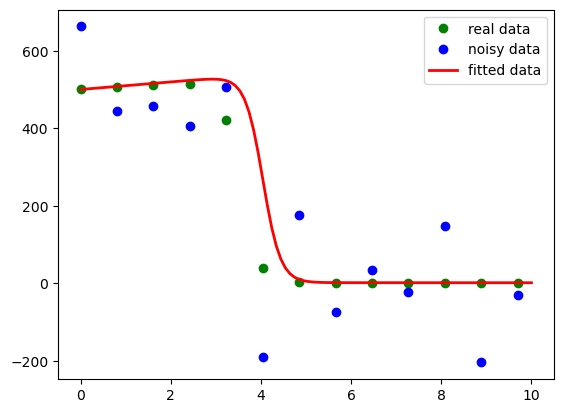

In [65]:
# Vezmeme průběh počtu živých (S)
from lmfit import minimize, Parameters, Parameter, report_fit
# Řešení systému ODE s počátečními podmínkami (x0) a parametry modelu (paras)
# Vrací časový vývoj populací
def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,p) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x

# Residuum pro fitování
# Počítá rozdíl mezi naměřenými daty a modelem
# Používá se při optimalizaci parametrů modelu
def residual(paras, t, data):
    x0 = paras['S0'].value, paras['Z0'].value, paras['R0'].value
    model = g(t, x0, paras)
    s_model = model[:, 0]
    return (s_model - data).ravel()

np.random.seed(1)       # kvůli reprodukovatelnosti


# Generování falešných dat
S_real = S[0::8]        # vybereme každý osmý prvek od počátečního indexu do konce (horní mez nespecifikována)
S_measured = S_real + np.random.randn(len(S_real)) * 100
t_measured = t[0::8]

plt.figure()
plt.plot(t_measured, S_real, 'o', color='g', label='real data')

# Přidání šumu do dat pro simulaci měřicích chyb
# Simulují realistické testování modelu
plt.plot(t_measured, S_measured, 'o', color='b', label='noisy data')

# Nastavení parametrů pro fitování
# počáteční hodnoty a meze pro parametry modelu
# možno zafixovat (vary=False)
params = Parameters()
params.add('S0', value=S0, min=490., max=510.)
params.add('Z0', value=Z0, vary=False)
params.add('R0', value=R0, vary=False)
params.add('P', value=10, min=8., max=12.)
params.add('d', value=0.0005, min=0.00001, max=0.005)
params.add('B', value=0.01, min=0.00001, max=0.01)
params.add('G', value=G, vary=False)
params.add('A', value=0.0005, min=0.00001, max=0.001)

# Fit model
# metoda nejmenších čtverců k minimalizaci rozdílů mezi modelem a naměřenými daty
result = minimize(residual, params, args=(t_measured, S_measured), method='leastsq')  # leastsq
# Kontrola výsledků fitování
data_fitted = g(t, y0, result.params)

plt.plot(t, data_fitted[:, 0], '-', linewidth=2, color='red', label='fitted data')
plt.legend()

plt.show()

In [66]:
# Zobrazit statistiky fitování
report_fit(result)


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 13
    # variables        = 5
    chi-square         = 359586.986
    reduced chi-square = 44948.3732
    Akaike info crit   = 142.960906
    Bayesian info crit = 145.785653
[[Variables]]
    S0:  500.000000 +/- 167.220531 (33.44%) (init = 500)
    Z0:  0 (fixed)
    R0:  0 (fixed)
    P:   10.0000000 +/- 510.046107 (5100.46%) (init = 10)
    d:   5.0000e-04 +/- 1.02485125 (204970.25%) (init = 0.0005)
    B:   0.01000000 +/- 1.6126e-10 (0.00%) (init = 0.01)
    G:   0.0001 (fixed)
    A:   5.0000e-04 +/- 20.7083928 (4141678.57%) (init = 0.0005)
[[Correlations]] (unreported correlations are < 0.100)
    C(B, A)  = -1.0000
    C(d, B)  = +0.9992
    C(d, A)  = -0.9991
    C(P, d)  = +0.9836
    C(P, B)  = +0.9795
    C(P, A)  = -0.9793
    C(S0, A) = -0.1579
    C(S0, B) = +0.1576
    C(S0, d) = +0.1501


#### Stochastické diferenciální rovnice (SDR)

např. model Black-Scholes pro ceny akcií:
$$dS_t=μ S_t dt+σ S_t dW_t$$


kde
- $S_t$​ ... cena akcie v čase $t$
- $μ$ ..... očekávaný výnos
- $σ$ ..... volatilita
- $W_t$​ ... Brownův pohyb

Numerická aproximace pomocí Euler-Maruyama schématu:
$$S_{t+Δt}=S_t+μS_tΔt+σS_tΔW_t$$


kde $ΔW_t$​ je normální náhodná veličina $N(0,Δt)$

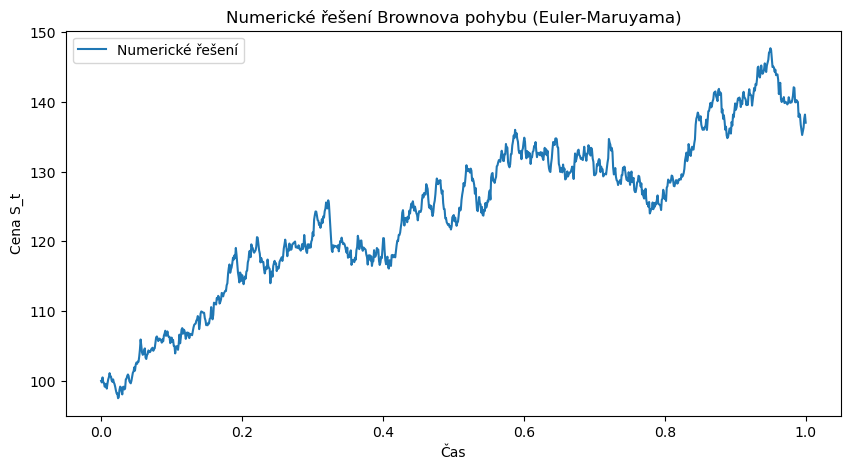

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry modelu
mu = 0.1     # Drift (střední růst)
sigma = 0.2  # Volatilita
T = 1.0      # Celkový čas
N = 1000     # Počet časových kroků
dt = T / N   # Velikost časového kroku
S0 = 100     # Počáteční hodnota

# Inicializace vektoru pro S_t
t = np.linspace(0, T, N)
S = np.zeros(N)
S[0] = S0

# Simulace Wienerova procesu (dW ~ N(0, dt))
dW = np.random.normal(scale=np.sqrt(dt), size=N-1)

# Euler-Maruyama schéma
for i in range(1, N):
    S[i] = S[i-1] + mu * S[i-1] * dt + sigma * S[i-1] * dW[i-1]

# Vykreslení výsledku
plt.figure(figsize=(10, 5))
plt.plot(t, S, label="Numerické řešení")
plt.xlabel("Čas")
plt.ylabel("Cena S_t")
plt.title("Numerické řešení Brownova pohybu (Euler-Maruyama)")
plt.legend()
plt.show()


Analytické řešení pomocí Itôova lemmatu

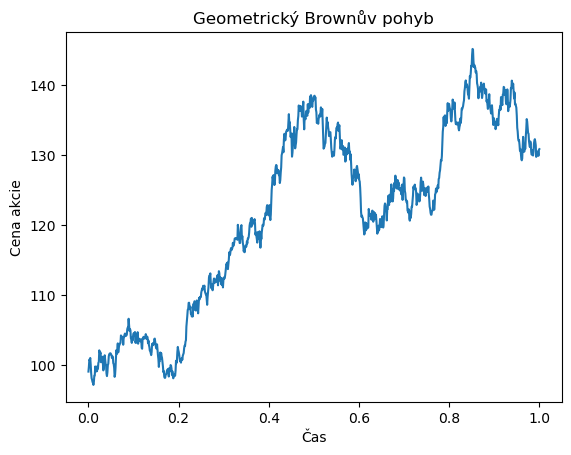

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry
T = 1.0         # časový horizont (rok)
N = 1000        # počet kroků
dt = T / N      # velikost kroku
mu = 0.1        # drift (průměrný růst)
sigma = 0.2     # volatilita
S0 = 100        # počáteční cena

# Generování Brownova pohybu
t = np.linspace(0, T, N)
W = np.random.normal(scale=np.sqrt(dt), size=N).cumsum()
# řešení pomocí Itôova lemmatu
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
# S​ má lognormální rozdělení

# Graf
plt.plot(t, S)
plt.xlabel("Čas")
plt.ylabel("Cena akcie")
plt.title("Geometrický Brownův pohyb")
plt.show()
